<img src="https://cdn.dribbble.com/userupload/5249948/file/original-af6c722d469e1717d1d130299f33278d.gif" width=20%>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/11FEoVLgt4lqQOBMKdLKt79KZZ393YAPN/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('walmart_data.csv')

In [5]:
df= pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 1.) checking the structure & characteristics of the dataset


**a) . The data type of all columns in the “customers” table.**

In [6]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

**b) . You can find the number of rows and columns given in the dataset**

In [7]:
df.shape

(550068, 10)

**Insights: ▶** There are 550068 records and 10 columns in the dataset.

**c) . Check for the missing values and find the number of missing values in each
column**

In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Insights : ▶**
By looking at the data, we can say that there are no null values present in any of the columns.

================================================================================


---


# 2. Detect Null values and outliers

**a.)  Find the outliers for every continuous variable in the dataset**

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


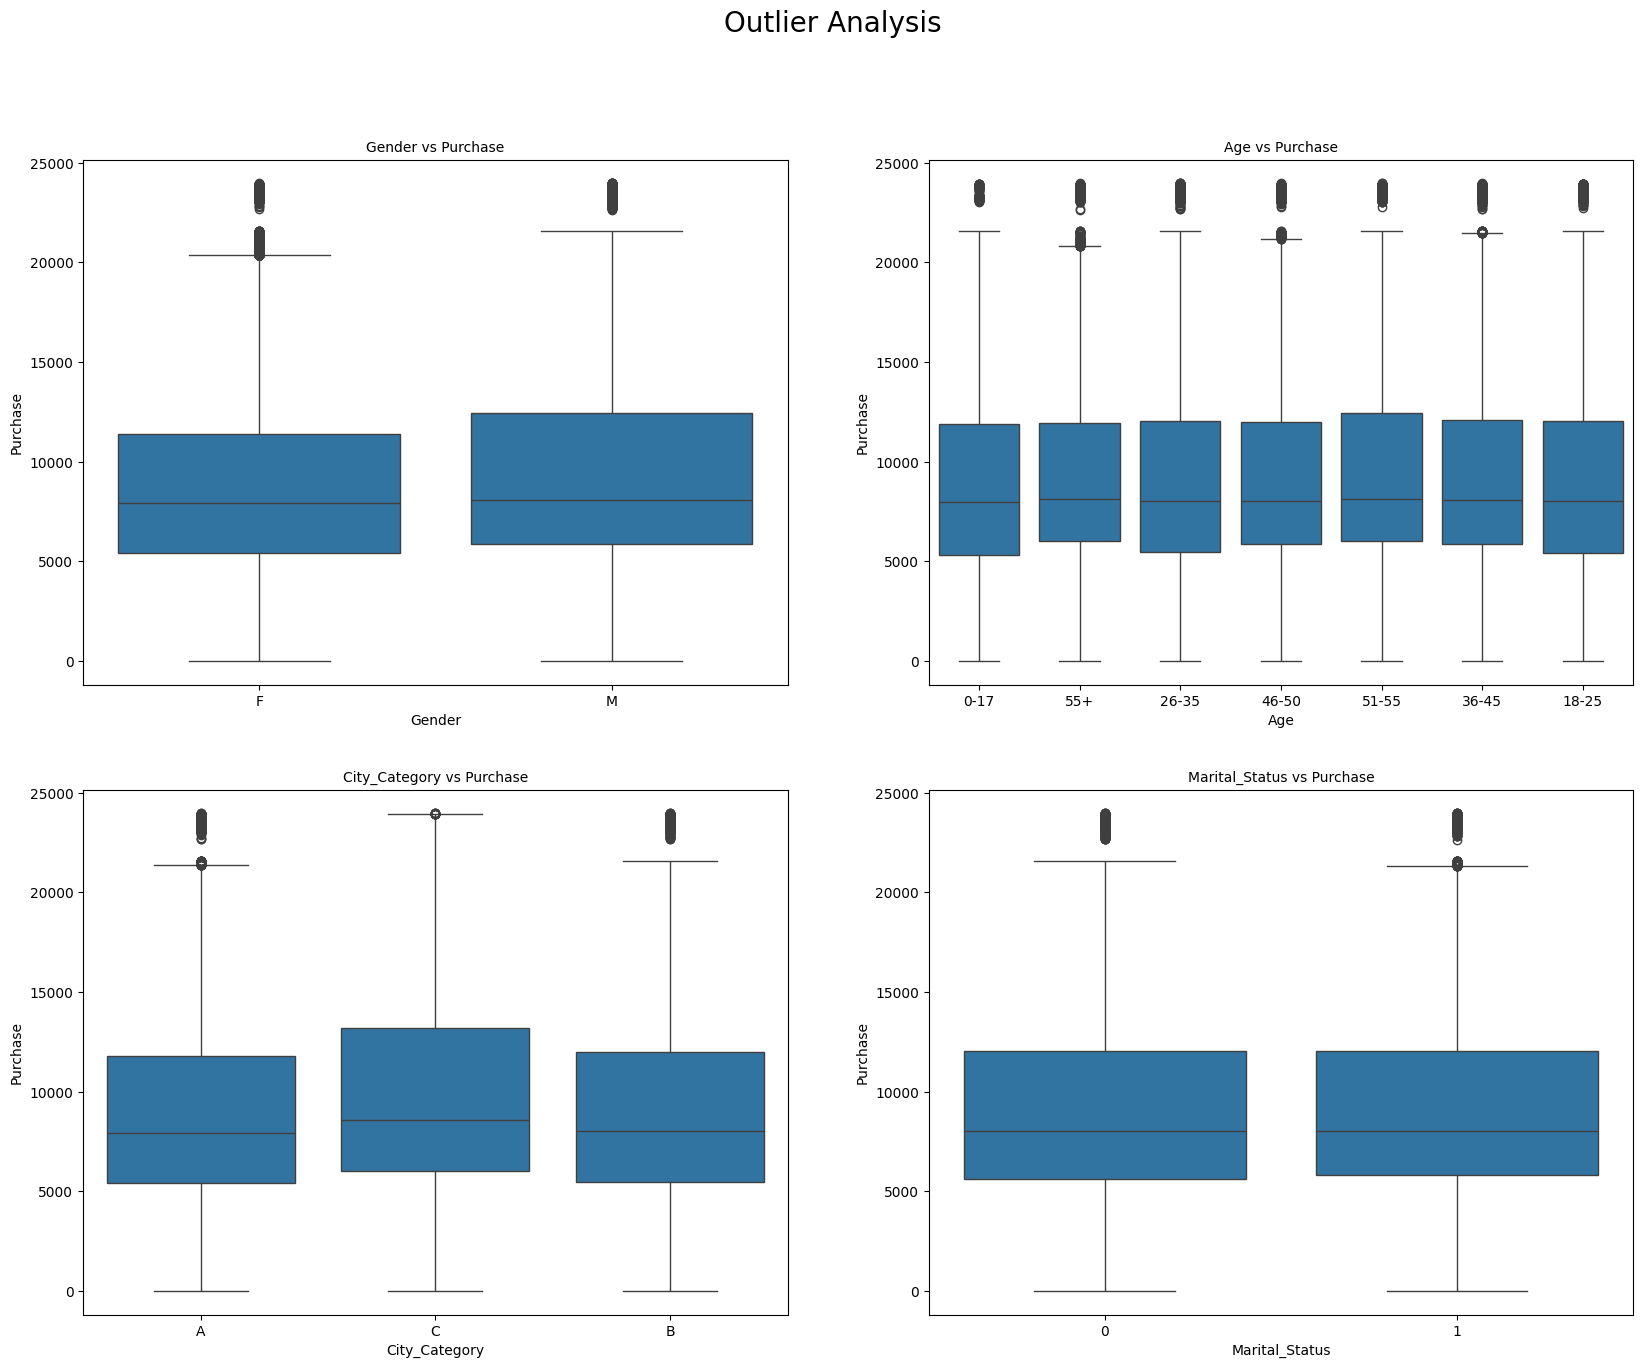

In [10]:
#Purchase amount is the countinous variable in the data set
plt.figure(figsize=(20,15))
plt.suptitle("Outlier Analysis",fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(data=df,x="Gender",y="Purchase")
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender vs Purchase",fontsize=10)

plt.subplot(2,2,2)
sns.boxplot(data=df,x="Age",y="Purchase")
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age vs Purchase",fontsize=10)

plt.subplot(2,2,3)
sns.boxplot(data=df,x="City_Category",y="Purchase")
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category vs Purchase",fontsize=10)

plt.subplot(2,2,4)
sns.boxplot(data=df,x="Marital_Status",y="Purchase")
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status vs Purchase",fontsize=10)
plt.show()

**b) . Remove/clip the data between the 5 percentile and 95 percentile**

In [11]:
# unique values in each column
for i in df.columns:
  print(i,' : ',df[i].nunique())

User_ID  :  5891
Product_ID  :  3631
Gender  :  2
Age  :  7
Occupation  :  21
City_Category  :  3
Stay_In_Current_City_Years  :  5
Marital_Status  :  2
Product_Category  :  20
Purchase  :  18105


In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
# we can see that Gender ,Age and City_Category column are in string(object) data type so we need to convert this datatype into integer to clip data
df_copy = df.copy()


df_copy['Gender'].replace(['M', 'F'], [1, 0], inplace=True)

df_copy['City_Category'].replace(['A', 'B','C'], [0, 1,2], inplace=True)

df_copy['Age'].replace(['0-17', '18-25', '26-35','36-45','46-50','51-55','55+'], [0, 1, 2,3,4,5,6], inplace=True)

# cliping the data np.clip() between the 5 percentile and 95 percentile
cols=['Gender','Age','City_Category','Marital_Status']

for col in cols:
  percentile = df_copy[col].quantile([0.05,0.95]).values
  df_copy[col] = np.clip(df_copy[col], percentile[0], percentile[1])



---



---


# 3. Data Exploration

**a. What products are different age groups buying?**

In [14]:
df_copy['Age'].unique()
# since we alrady replace age group with numeric value and applied np.clip , we are getting here total 5 group
# let's rename this age group with better meaningful word
df_copy['Age'].replace([1,2,3,4,5],['under_25_age','between_26-35_age','between_36-45_age','between_46-50_age','above_51_age'],inplace=True)
# Grouping by AgeGroup and Product, and counting occurrences
grouped_data =  df_copy.groupby(['Age']).size().reset_index(name='Count')
grouped_data

,Age,Count
0,above_51_age,60005
1,between_26-35_age,219587
2,between_36-45_age,110013
3,between_46-50_age,45701
4,under_25_age,114762


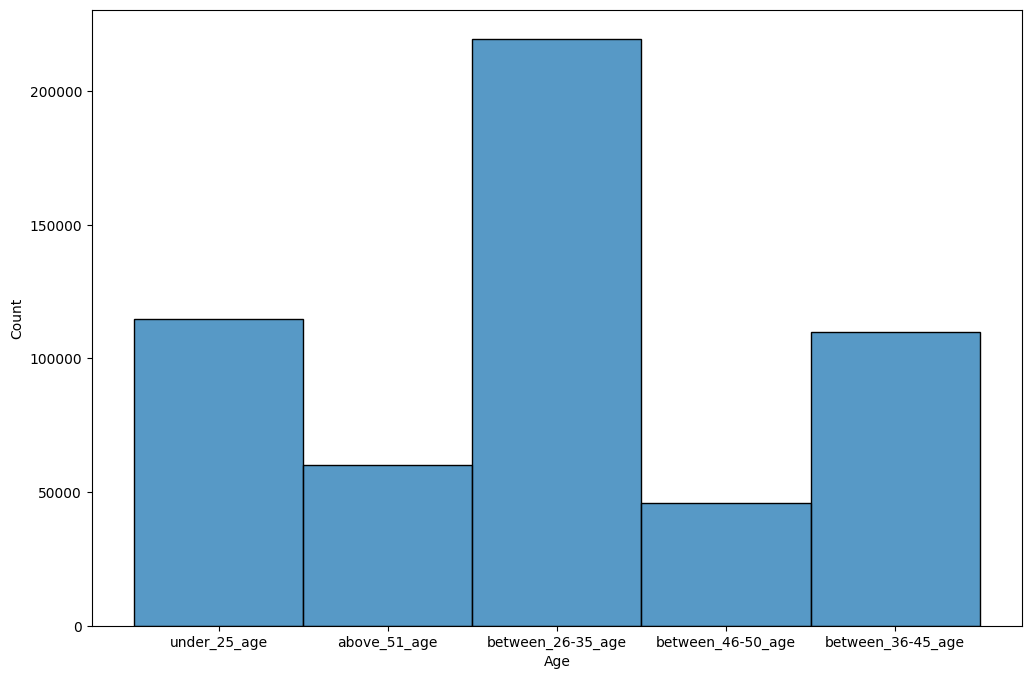

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_copy,x='Age',binwidth=2)
plt.show()


**Insights ▶** we can observe that age group between 26 and 35 are more in buying products while age group between 46 and 50 are least buyer among these.

**b. Is there a relationship between age, marital status, and the amount spent**

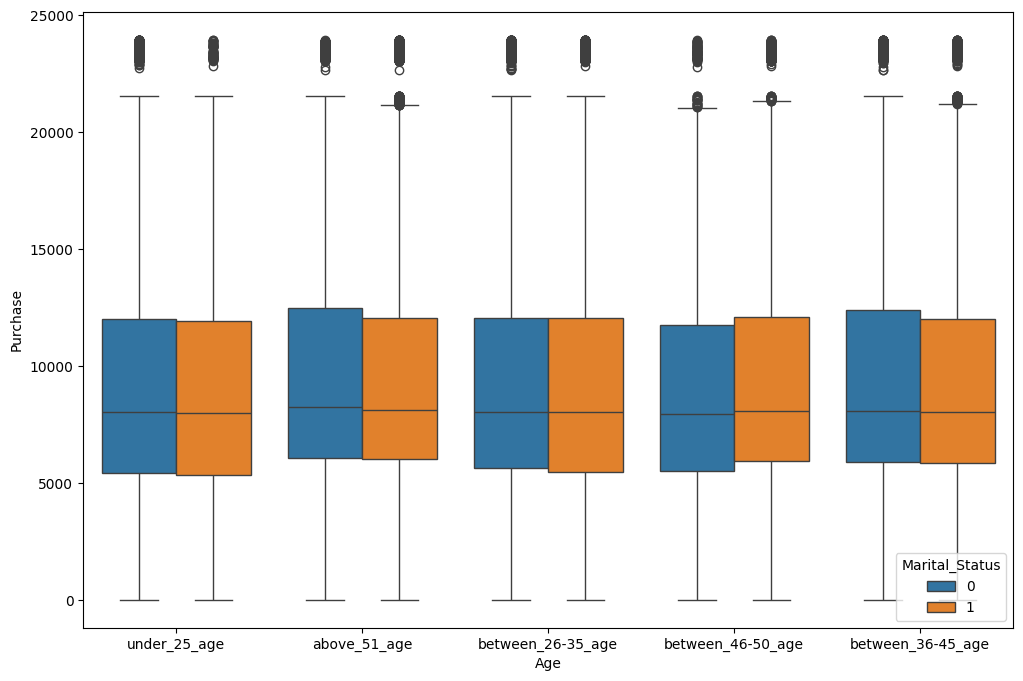

In [16]:
# You can do multivariate analysis to find the relationship between age,marital status, and the amount spent
plt.figure(figsize=(12,8))
sns.boxplot(data=df_copy, x='Age',y='Purchase', hue='Marital_Status')
plt.show()

**insights ▶** product purchase in all age group againts married and unmarried are almost same, there is no significant difference among them.

**c. Are there preferred product categories for different genders?**

<Axes: xlabel='Product_Category', ylabel='Count'>

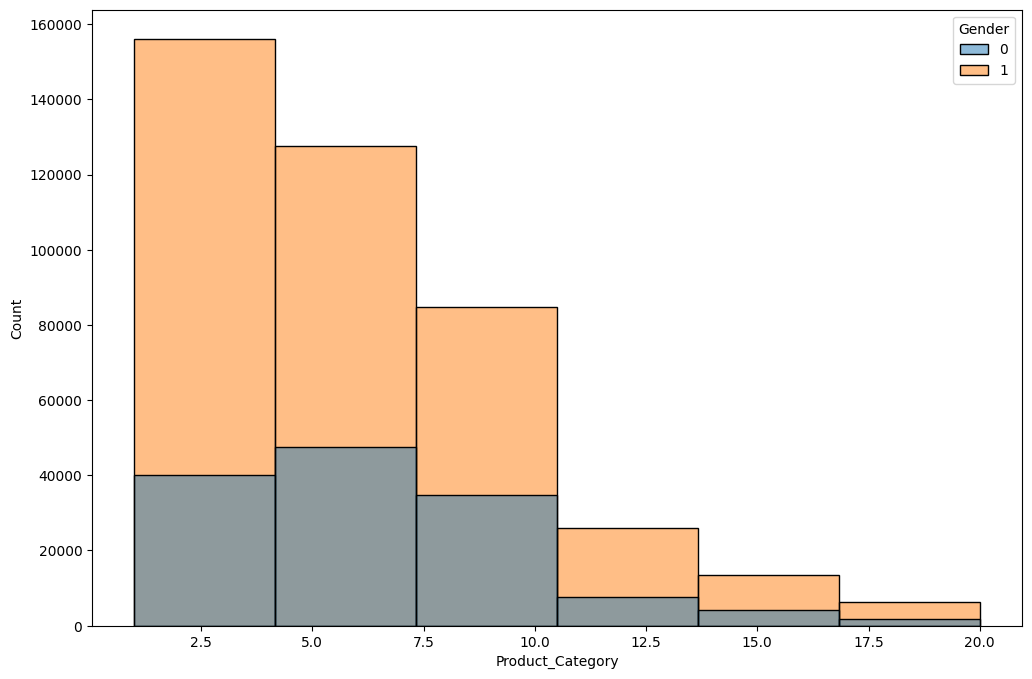

In [17]:
# here Gender -->  0 : Female, 1: Male
plt.figure(figsize=(12,8))
sns.histplot(data=df_copy,x='Product_Category',hue='Gender',binwidth=3)

**Insights ▶** here product category(2.5) has more user male & female where category (20) has lowest user for male as well female.



---



---

# 4. How does gender affect the amount spent? ⏳

In [18]:
df.groupby("Gender")[["Purchase"]].describe().reset_index()

Gender  Purchase                                                           \
             count         mean          std   min     25%     50%      75%   
0      F  135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
1      M  414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            
       max  
0  23959.0  
1  23961.0

In [ ]:
male_sample_means=[df[df["Gender"]=="M"].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(male_sample_means)

In [ ]:
Female_sample_means=[df[df["Gender"]=="F"].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(Female_sample_means)

From the above,unable to conclude since there is overlap in spending behaviour in both male and female. Hence will increase the sample size to 3000

In [ ]:
male_sample_means1=[df[df["Gender"]=="M"].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(male_sample_means1)

In [ ]:
Female_sample_means1=[df[df["Gender"]=="F"].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(Female_sample_means1)

In [ ]:
# at 95% sample size for 3000 sample size
np.percentile(male_sample_means1,[2.5,97.5]),np.percentile(Female_sample_means1,[2.5,97.5])

**a. From the above calculated CLT answer the following questions.**

**i.** Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?

**Answer:** Confidence interval computed using the entire dataset,we were not able to conclude because of the outliers which pulls the mean value of both male and female to be in the same levels casuing overlap.hence unable to make decision

**ii.** How is the width of the confidence interval affected by the sample size?

**Answer :** Performed CI with sample size of 300 for 1000 iterations at 95% and 90% confidence interval,the results were same - there was overlap of levels in both male and female - hence unable to conclude

**iii.** Do the confidence intervals for different sample sizes overlap?


**Answer :** Increased sample size to 3000 for 1000 iterations at 95% CI, there was no overlap. at 95% confidence Interval (3000 sample size) we were able to conclude that mean spending of male is more than the female.

**iv.** How does the sample size affect the shape of the distributions of the
means?

**Answer :** increasing the sample size,decreases the standard error.



---



---

\

## 6. How does Age affect the amount spent? ✒

In [ ]:
df.groupby("Age")[["Purchase"]].describe().reset_index()

In [ ]:
Age=['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
Age_sample_means1=[df[df["Age"]=='0-17'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means2=[df[df["Age"]=='18-25'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means3=[df[df["Age"]=='26-35'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means4=[df[df["Age"]=='36-45'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means5=[df[df["Age"]=='46-50'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means6=[df[df["Age"]=='51-55'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means7=[df[df["Age"]=='55+'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]

In [ ]:
np.mean(Age_sample_means1),np.mean(Age_sample_means2),np.mean(Age_sample_means3),np.mean(Age_sample_means4),np.mean(Age_sample_means5),np.mean(Age_sample_means6),np.mean(Age_sample_means7)

In [ ]:
#95 % CI
np.percentile(Age_sample_means1,[2.5,97.5]),np.percentile(Age_sample_means2,[2.5,97.5]),np.percentile(Age_sample_means3,[2.5,97.5]),np.percentile(Age_sample_means4,[2.5,97.5]),np.percentile(Age_sample_means5,[2.5,97.5]),np.percentile(Age_sample_means6,[2.5,97.5]),np.percentile(Age_sample_means7,[2.5,97.5])

In [ ]:
#90 % CI
np.percentile(Age_sample_means1,[5,95]),np.percentile(Age_sample_means2,[5,95]),np.percentile(Age_sample_means3,[5,95]),np.percentile(Age_sample_means4,[5,95]),np.percentile(Age_sample_means5,[5,95]),np.percentile(Age_sample_means6,[5,95]),np.percentile(Age_sample_means7,[5,95])

From the above,unable to conclude since there is overlap in spending behaviour in all age groups. Hence will increase the sample size to 3000

In [ ]:
A_sample_means1=[df[df["Age"]=='0-17'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means2=[df[df["Age"]=='18-25'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means3=[df[df["Age"]=='26-35'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means4=[df[df["Age"]=='36-45'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means5=[df[df["Age"]=='46-50'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means6=[df[df["Age"]=='51-55'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means7=[df[df["Age"]=='55+'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]

In [ ]:
np.mean(A_sample_means1),np.mean(A_sample_means2),np.mean(A_sample_means3),np.mean(A_sample_means4),np.mean(A_sample_means5),np.mean(A_sample_means6),np.mean(A_sample_means7)

In [ ]:
#95 % CI
np.percentile(A_sample_means1,[2.5,97.5]),np.percentile(A_sample_means2,[2.5,97.5]),np.percentile(A_sample_means3,[2.5,97.5]),np.percentile(A_sample_means4,[2.5,97.5]),np.percentile(A_sample_means5,[2.5,97.5]),np.percentile(A_sample_means6,[2.5,97.5]),np.percentile(A_sample_means7,[2.5,97.5])

In [ ]:

#90 % CI
np.percentile(A_sample_means1,[5,95]),np.percentile(A_sample_means2,[5,95]),np.percentile(A_sample_means3,[5,95]),np.percentile(A_sample_means4,[5,95]),np.percentile(A_sample_means5,[5,95]),np.percentile(A_sample_means6,[5,95]),np.percentile(A_sample_means7,[5,95])

From the above,unable to conclude since there is overlap in spending behaviour in all age groups. Hence will increase the sample size to 30000

In [ ]:
AA_sample_means1=[df[df["Age"]=='0-17'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means2=[df[df["Age"]=='18-25'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means3=[df[df["Age"]=='26-35'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means4=[df[df["Age"]=='36-45'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means5=[df[df["Age"]=='46-50'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means6=[df[df["Age"]=='51-55'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means7=[df[df["Age"]=='55+'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]

In [ ]:
np.mean(AA_sample_means1),np.mean(AA_sample_means2),np.mean(AA_sample_means3),np.mean(AA_sample_means4),np.mean(AA_sample_means5),np.mean(AA_sample_means6),np.mean(AA_sample_means7)

In [ ]:
#95 % CI
np.percentile(AA_sample_means1,[2.5,97.5]),np.percentile(AA_sample_means2,[2.5,97.5]),np.percentile(AA_sample_means3,[2.5,97.5]),np.percentile(AA_sample_means4,[2.5,97.5]),np.percentile(AA_sample_means5,[2.5,97.5]),np.percentile(AA_sample_means6,[2.5,97.5]),np.percentile(AA_sample_means7,[2.5,97.5])

In [ ]:
#90 % CI
np.percentile(AA_sample_means1,[5,95]),np.percentile(AA_sample_means2,[5,95]),np.percentile(AA_sample_means3,[5,95]),np.percentile(AA_sample_means4,[5,95]),np.percentile(AA_sample_means5,[5,95]),np.percentile(AA_sample_means6,[5,95]),np.percentile(AA_sample_means7,[5,95])

In [ ]:
#85 % CI
np.percentile(AA_sample_means1,[7.5,92.5]),np.percentile(AA_sample_means2,[7.5,92.5]),np.percentile(AA_sample_means3,[7.5,92.5]),np.percentile(AA_sample_means4,[7.5,92.5]),np.percentile(AA_sample_means5,[7.5,92.5]),np.percentile(AA_sample_means6,[7.5,92.5]),np.percentile(AA_sample_means7,[7.5,92.5])

In [ ]:
#80 % CI
np.percentile(AA_sample_means1,[10,90]),np.percentile(AA_sample_means2,[10,90]),np.percentile(AA_sample_means3,[10,90]),np.percentile(AA_sample_means4,[10,90]),np.percentile(AA_sample_means5,[10,90]),np.percentile(AA_sample_means6,[10,90]),np.percentile(AA_sample_means7,[10,90])

**a. From the above calculated CLT answer the following questions.**

**i.** Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?


**Answer :**  Performed CI with sample size of 300 for 1000 iterations at 95%,90% confidence interval,the results were same - there was overlap of spending in all age groups - hence unable to conclude.

**ii.** How is the width of the confidence interval affected by the sample size?


**Answer :** Increased sample size to 3000 for 1000 iterations at 95%,90% CI - there was overlap of spending in all age groups - hence unable to conclude.

**iii.** Do the confidence intervals for different sample sizes overlap?


**Answer :** Increased sample size to 30000 for 1000 iterations at 95%,90%,85%,80% CI - not all age groups have overlap.hence the population is the same as sample.

**iv.** How does the sample size affect the shape of the distributions of the
means?


**Answer :** Hence 95% confidence level,the age group 51-55 spends the most and (0-17) the least.netween 18-50 the spending habit is almost the same.



---



---

## 7. Create a report 📑


**a.** Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?


**Answer :**   On 95% Confidence Interval, we can conclude that men average spending is more than the females.hence walmart must focus on women products to improve the avg spending either through offers,discounts,advertising to increase footfalls.

**b.** Report whether the confidence intervals for the average amount spent by
married and unmarried (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?

In [ ]:
unmarried_sample_means=[df[df["Marital_Status"]==0].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(unmarried_sample_means)

In [ ]:
married_sample_means=[df[df["Marital_Status"]==1].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(married_sample_means)

From the above,unable to conclude since there is overlap in spending behaviour in both male and female. Hence will increase the sample size to 3000

In [ ]:
unmarried_sample_means1=[df[df["Marital_Status"]==0].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(unmarried_sample_means1)
married_sample_means1=[df[df["Marital_Status"]==1].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(married_sample_means1)


In [ ]:
# at 95% sample size for 3000 sample size
np.percentile(unmarried_sample_means1,[2.5,97.5]),np.percentile(married_sample_means1,[2.5,97.5])

**Answer :** Interms of Marital status, there is no significant change in terms of spending.hence walmart can target the audiences based on these aspect to improve their spending, hence increase in sales for the business.

**c.** Report whether the confidence intervals for the average amount spent by
different age groups (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?


**Answer:** Performed CI with sample size of 300 for 1000 iterations at 95%,90% confidence interval,the results were same - there was overlap of spending in all age groups - hence unable to conclude.
* Interms of Age group, there is slight significant change interms of spending at 80% Confidence interval between the age groups. age group(50-55) spends the most and agegroup(0-17) is the least.overall it remains same between age(18-40).



---



---

## 8. Recommendations ✅


1.   Walmart should provide some good offers to Women as they usually like to shop
more. When they see some nice offers or discounts, they will definetly buy more.

2.   Walmart can also launch some Age wise discounts or offer goodies/freebies to customers to attract people from all age groups.

3.   Range of products which interest the people should also be diversified.

4.    There is good opporuntiy for walmart to club the marital status and age groups to create a criteria levels and do target producting sales,which will drive their revenue and improve the consumer spending.



---



---

